In [180]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [195]:
# Generate some data
sigma = 10
num = 10000
np.random.seed(1)
t = np.arange(0, num, 1)
x = t + np.random.normal(0, sigma, num)
y = -t + np.random.normal(0, sigma, num)
z = t**2 + np.random.normal(0, sigma, num)
X = np.array([x, y, z]).reshape((3, num))

X = np.transpose(X) # X has columns x,y,z

# Generate labels
num_label = 100
cluster_label = []
for i in range(num_label):
    if i == num_label - 1:
        total = sum([len(arr) for arr in cluster_label])
        cluster_label.append(np.repeat(i, num-total))
    else:
        repeat_length = abs(int(num/num_label + np.random.normal(0, num/num_label/10, 1)))
        cluster_label.append(np.repeat(i, repeat_length))

cluster_label = np.concatenate(cluster_label)

# Define MSM variables
mapping = {}
for i in range(num_label):
    mapping[i] = i
    
populations = np.random.uniform(0,1,num_label)
populations = populations/sum(populations)
print [len(np.where(cluster_label == state)[0]) for state in range(num_label)]
print populations

MFTP = np.zeros((num_label, num_label))
for i in range(num_label):
    for j in range(num_label):
        if i != j:
            MFTP[i][j] = ((i - j) + np.random.normal(0, 1, 1))**2

[103, 95, 112, 96, 122, 126, 109, 95, 94, 95, 94, 89, 100, 94, 97, 87, 95, 77, 101, 86, 91, 92, 116, 104, 88, 104, 103, 98, 105, 112, 102, 108, 109, 96, 113, 89, 92, 93, 103, 105, 79, 98, 102, 122, 91, 105, 109, 98, 103, 96, 109, 92, 93, 92, 111, 83, 75, 111, 116, 91, 114, 87, 86, 106, 88, 101, 106, 90, 109, 90, 101, 91, 105, 103, 108, 105, 110, 90, 101, 102, 97, 115, 108, 136, 86, 113, 93, 77, 109, 83, 120, 84, 98, 99, 98, 83, 101, 100, 105, 136]
[ 0.00527886  0.01765587  0.01557854  0.01244514  0.00502695  0.01623818
  0.01099988  0.01532479  0.01301767  0.01705203  0.01285904  0.00337329
  0.00225222  0.00603165  0.01760063  0.01117855  0.01816151  0.00660035
  0.00047729  0.01032644  0.01597167  0.01550705  0.00064505  0.0050782
  0.0048306   0.0181921   0.01455538  0.01467363  0.0042308   0.01294343
  0.0114227   0.00869267  0.00855914  0.01817025  0.01105641  0.00684906
  0.00322319  0.0178171   0.01426107  0.01503753  0.00608419  0.01510439
  0.01564085  0.00837619  0.00346595  

In [196]:
# Sample Population
limit_list = []
state_list = []
for state in mapping.keys(): #goes through the original frame labels
    num_frame = np.where(cluster_label == state)[0].shape[0]
    prob = populations[mapping[state]]
    limit = num_frame/prob
    limit_list.append(limit)
    state_list.append(state)

limiting_state = state_list[np.argmin(limit_list)] #original frame label
max_frame = limit_list[mapping[limiting_state]]
print '(limiting state, max frame): ', limiting_state, max_frame
print max_frame*populations[mapping[limiting_state]], len(np.where(cluster_label == limiting_state)[0])

(limiting state, max frame):  87 4339.96735318
77.0 77


In [197]:
# Sample based on population vector
num_frame = max_frame

if num_frame > max_frame:
    print "error: exceeding max number of frames ", max_frame

num_state_frames = np.array(num_frame*populations).astype(int)

frame_idx = np.empty((0,))
for state in mapping.keys():
    options = np.where(cluster_label == state)[0]
    print state, len(options), num_state_frames[mapping[state]]
    frame_idx = np.hstack((frame_idx,np.random.choice(options, num_state_frames[mapping[state]], replace=False)))
frame_idx = frame_idx.astype(int)

X_hat = X[frame_idx, :]

0 103 22
1 95 76
2 112 67
3 96 54
4 122 21
5 126 70
6 109 47
7 95 66
8 94 56
9 95 74
10 94 55
11 89 14
12 100 9
13 94 26
14 97 76
15 87 48
16 95 78
17 77 28
18 101 2
19 86 44
20 91 69
21 92 67
22 116 2
23 104 22
24 88 20
25 104 78
26 103 63
27 98 63
28 105 18
29 112 56
30 102 49
31 108 37
32 109 37
33 96 78
34 113 47
35 89 29
36 92 13
37 93 77
38 103 61
39 105 65
40 79 26
41 98 65
42 102 67
43 122 36
44 91 15
45 105 51
46 109 54
47 98 55
48 103 29
49 96 40
50 109 42
51 92 44
52 93 47
53 92 22
54 111 57
55 83 36
56 75 25
57 111 2
58 116 68
59 91 13
60 114 40
61 87 54
62 86 1
63 106 36
64 88 63
65 101 59
66 106 2
67 90 50
68 109 81
69 90 21
70 101 0
71 91 33
72 105 77
73 103 91
74 108 25
75 105 57
76 110 25
77 90 33
78 101 6
79 102 23
80 97 19
81 115 72
82 108 27
83 136 59
84 86 7
85 113 58
86 93 48
87 77 77
88 109 17
89 83 38
90 120 43
91 84 2
92 98 61
93 99 42
94 98 81
95 83 21
96 101 39
97 100 24
98 105 73
99 136 30


In [198]:
# check if index is correct

cluster_label_sample = []
for i, point in enumerate(X_hat):
    idx = np.where(X == point)[0][0]
    if idx != frame_idx[i]: # Check index matches up
        print "FAKE"
    cluster_label_sample.append(cluster_label[idx])
cluster_label_sample = np.array(cluster_label_sample)
label_count = [len(np.where(cluster_label_sample == state)[0]) for state in range(num_label)]
populations_hat = np.array(label_count).astype(float)/sum(label_count)
print 'label count: ', label_count
print 'estimated population vector: ', populations_hat
print 'population % error: ', abs((populations - populations_hat)*100/populations)

label count:  [22, 76, 67, 54, 21, 70, 47, 66, 56, 74, 55, 14, 9, 26, 76, 48, 78, 28, 2, 44, 69, 67, 2, 22, 20, 78, 63, 63, 18, 56, 49, 37, 37, 78, 47, 29, 13, 77, 61, 65, 26, 65, 67, 36, 15, 51, 54, 55, 29, 40, 42, 44, 47, 22, 57, 36, 25, 2, 68, 13, 40, 54, 1, 36, 63, 59, 2, 50, 81, 21, 0, 33, 77, 91, 25, 57, 25, 33, 6, 23, 19, 72, 27, 59, 7, 58, 48, 77, 17, 38, 43, 2, 61, 42, 81, 21, 39, 24, 73, 30]
estimated population vector:  [ 0.00512462  0.01770324  0.0156068   0.01257862  0.00489168  0.01630561
  0.01094805  0.01537386  0.01304449  0.01723736  0.01281155  0.00326112
  0.00209644  0.00605637  0.01770324  0.01118099  0.01816911  0.00652225
  0.00046587  0.01024924  0.01607268  0.0156068   0.00046587  0.00512462
  0.00465875  0.01816911  0.01467505  0.01467505  0.00419287  0.01304449
  0.01141393  0.00861868  0.00861868  0.01816911  0.01094805  0.00675518
  0.00302819  0.01793618  0.01420918  0.01514093  0.00605637  0.01514093
  0.0156068   0.00838574  0.00349406  0.0118798   0.01

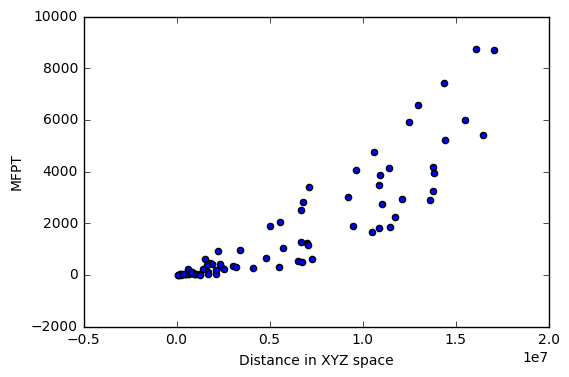

In [221]:
# Plot RMSD vs MFTP
cluster_assignments = cluster_label
chosen_indices = frame_idx
fs_mfpt_matrix = MFTP

num_frames = X_hat.shape[0]
num_points = 80

distances = []
mfpt_times = []
for p in range(num_points):
    frame_pair = np.random.randint(low=0, high=num_frames-1, size=2) # frame number in sim_data
    true_frame_pair = (int(chosen_indices[frame_pair[0]]), int(chosen_indices[frame_pair[1]])) # corresponding original frame numbers
    msm_frame_pair = (mapping[cluster_assignments[true_frame_pair[0]]], mapping[cluster_assignments[true_frame_pair[1]]])
    if msm_frame_pair[0] != msm_frame_pair[1] and fs_mfpt_matrix[msm_frame_pair[0]][msm_frame_pair[1]] > 0:
        distances.append(np.linalg.norm(X[frame_pair[0],:] - X[frame_pair[1], :]))
        mfpt_times.append(fs_mfpt_matrix[msm_frame_pair[0]][msm_frame_pair[1]])
plt.scatter(np.array(distances), np.array(mfpt_times))
plt.xlabel('Distance in XYZ space')
plt.ylabel('MFPT')